In [1]:
import cv2
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input,AveragePooling2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import datetime
import time

In [11]:
datadir = "C:\\Users\\snsha\\Anaconda3\\anaconda\\envs\\tensor-flow\\Anomaly detection\\Dataset"
cat = ["Non-violence", "Violence"]
training_data = []
for cate in cat:
    path = os.path.join(datadir,cate)
    class_num = cat.index(cate)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        filter = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        new_img = cv2.filter2D(img_array, -1, filter)
        new_array = cv2.resize(new_img,(299,299))
        new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
        training_data.append([new_array,class_num])
random.shuffle(training_data) # shuffling the dataset 
X = []
Y = []
for features,labels in training_data:
    X.append(features)
    Y.append(labels)
#saving the dataset as pickle file 
pickle_out = open("C:\\Users\\snsha\\Anaconda3\\anaconda\\envs\\tensor-flow\\Anomaly detection\\X_1.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("C:\\Users\\snsha\\Anaconda3\\anaconda\\envs\\tensor-flow\\Anomaly detection\\Y_1.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()




In [6]:
if os.path.getsize("C:\\Users\\snsha\\Anaconda3\\anaconda\\envs\\tensor-flow\\Anomaly detection\\X_1.pickle") > 0:
    with open("C:\\Users\\snsha\\Anaconda3\\anaconda\\envs\\tensor-flow\\Anomaly detection\X_1.pickle","rb") as f:
        unpickler = pickle.Unpickler(f)
        X = unpickler.load()
    with open("C:\\Users\\snsha\\Anaconda3\\anaconda\\envs\\tensor-flow\\Anomaly detection\\Y_1.pickle","rb") as f:
        unpickler = pickle.Unpickler(f)
        Y = unpickler.load()

#slpitting images into test and train sets
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(X, Y, test_size=0.15, random_state=1)
x_train = np.array(x_train_orig)
x_test = np.array(x_test_orig)
y_train = np.array(y_train_orig)
y_test = np.array(y_test_orig)

In [9]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)



In [5]:
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

val_aug = ImageDataGenerator(rescale=1./255,fill_mode="nearest")


In [7]:
preModel = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(299, 299, 3)))
preModel.trainable = False

In [8]:

headModel = preModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = BatchNormalization(axis=1)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = BatchNormalization(axis=1)(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = BatchNormalization(axis=1)(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = BatchNormalization(axis=1)(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = BatchNormalization(axis=1)(headModel)
#headModel = Dropout(0.3)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)
  


In [9]:
model = Model(inputs=preModel.input, outputs=headModel)
#model.summary()

In [10]:
opt = Adam(lr=1e-3)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [11]:
trained_model = model.fit(
    x = train_aug.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) // 32,
    validation_data=val_aug.flow(x_test, y_test),
    validation_steps=len(x_test) // 32,
    epochs=30)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 45 steps, validate for 7 steps
Epoch 1/30
45/45 [==============================] - 60s 1s/step - loss: 0.4583 - accuracy: 0.7898 - val_loss: 0.4176 - val_accuracy: 0.7946
Epoch 2/30
45/45 [==============================] - 32s 709ms/step - loss: 0.3150 - accuracy: 0.8719 - val_loss: 0.2832 - val_accuracy: 0.9152
Epoch 3/30
45/45 [==============================] - 32s 712ms/step - loss: 0.2939 - accuracy: 0.8726 - val_loss: 0.2087 - val_accuracy: 0.9464
Epoch 4/30
45/45 [==============================] - 32s 711ms/step - loss: 0.2349 - accuracy: 0.9108 - val_loss: 0.1722 - val_accuracy: 0.9598
Epoch 5/30
45/45 [==============================] - 32s 711ms/step - loss: 0.2250 - accuracy: 0.8938 - val_loss: 0.1366 - val_accuracy: 0.9554
Epoch 6/30
45/45 [==============================] - 32s 711ms/step - loss: 0.1961 - accuracy: 0.9200 - val_loss: 0.1513 - val_accuracy: 0.9509
Epoch 7/30
45/45 [==============================] - 33

In [ ]:
preModel.trainable = True
for layer in preModel.layers[112:]:
    layer.trainable = True

In [ ]:
opt = Adam(lr=1e-4)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
fine_tune = 10
total = 30
hist = model.fit(
    x = train_aug.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) // 32,
    validation_data=val_aug.flow(x_test, y_test),
    validation_steps=len(x_test) // 32,
    epochs=total,
    initial_epoch = 20)

In [12]:
X_test = x_test/255.0
model.evaluate(X_test, y_test)

255/255 [==============================] - 8s 31ms/sample - loss: 0.0789 - accuracy: 0.9765


[0.07886280844024583, 0.9764706]

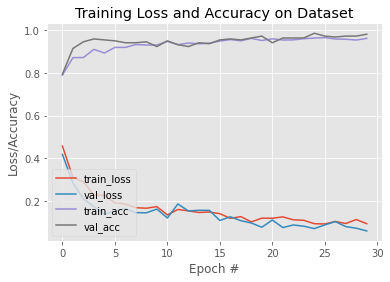

In [24]:
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), trained_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), trained_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), trained_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), trained_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [3]:
model.save("anomalydetection_Xception_new.h5")

NameError: name 'model' is not defined

In [12]:
loaded_model = keras.models.load_model('anomalydetection_Xception_new.h5')
#loaded_model.summary()


In [13]:
from collections import deque


In [23]:
Q = deque(maxlen=64)

In [20]:
vs = cv2.VideoCapture("C:\\Users\\snsha\\Anaconda3\\anaconda\\envs\\tensor-flow\\Anomaly detection\\test_video.mp4")
#vs = cv2.VideoCapture(0)
writer = None
(W, H) = (None, None)
label = None
output_path = 'result_xcep_new_3.mp4'
while True:
    (grabbed, frame) = vs.read()
    if not grabbed:
        break
    if W is None or H is None:
        (H, W) = frame.shape[:2]
        h = int(H)
        w = int(W)
    output = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (299,299)).astype("float32")
    frame = frame/255.0
    preds = loaded_model.predict(np.expand_dims(frame, axis=0))[0]
    Q.append(preds)
    
    results = np.array(Q).mean(axis=0)
    if results[0] >= 0.5:
        label = "Violent"
        text = "{} activity".format(label)
        cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 0, 255), 5)
    else:
        label = "Non-Violent"
        text = "{} activity".format(label)
        cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 5)
    if writer is None:
        writer = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XIVD'), 30, (w, h), True)
    writer.write(output)
    cv2.imshow("window",output)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
writer.release()
cv2.destroyAllWindows() 

In [21]:
from datetime import datetime
import pandas as pd

In [22]:
df = pd.DataFrame(columns=["Start","End"])


In [35]:
#to print into csv
vs = cv2.VideoCapture("C:\\Users\\snsha\\Anaconda3\\anaconda\\envs\\tensor-flow\\Anomaly detection\\test_video.mp4")
#vs = cv2.VideoCapture(0)
writer = None
(W, H) = (None, None)
label = "Non-violent"
status_list = [None,None]
time = []
while True:
    status = 0
    (grabbed, frame) = vs.read()
    if not grabbed:
        break
    frame_ori = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_re = cv2.resize(frame_ori, (299,299)).astype("float32")
    frame_norm = frame_re/255.0
    preds = loaded_model.predict(np.expand_dims(frame_norm, axis=0))[0]
    Q.append(preds)
    results = np.array(Q).mean(axis=0)
    if results[0] >= 0.5:
        label = "Violent"
        status = 1
                               
    else:
        label = "NOn-violent"
    status_list.append(status)
    status_list= status_list[-2:]
    if status_list[-1] == 1 and status_list[-2] == 0:
        time.append(datetime.now())
        print(status_list)
    elif status_list[-1]== 0 and status_list[-2] == 1:
        time.append(datetime.now())
        print(status_list)
      
    cv2.imshow("window",frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break
for i in range(0,len(time),2):
    df = df.append({"Start":time[i],"End":time[i+1]},ignore_index = True)
print(time)
df.to_csv("report.csv")
vs.release()
cv2.destroyAllWindows() 

[0, 1]
[1, 0]
[datetime.datetime(2020, 12, 10, 12, 4, 44, 388151), datetime.datetime(2020, 12, 10, 12, 4, 56, 761840)]


In [36]:
df

,Start,End
0,2020-12-10 11:43:52.458018,2020-12-10 11:44:04.494638
1,2020-12-10 12:04:44.388151,2020-12-10 12:04:56.761840


In [1]:
import pandas as pd

In [3]:
file = pd.read_csv("report.csv")

In [4]:
print(file)

Empty DataFrame
Columns: [Violent, 16:36:361:44]
Index: []


In [2]:
df = pd.DataFrame(data = None)

In [3]:
df

""


In [4]:
df.insert(0,"Time","")
df.insert(1,"activity","")

In [5]:
df

,Time,activity


In [12]:
import time
for i in range(10):
    time.sleep(1)
    df.loc[i,"Time"] = datetime.now()

In [13]:
df

,Time,activity
0,2020-12-06 14:00:18.630860,NaN
1,2020-12-06 14:00:19.630989,NaN
2,2020-12-06 14:00:20.631608,NaN
3,2020-12-06 14:00:21.632338,NaN
4,2020-12-06 14:00:22.633569,NaN
...,...,...
95,2020-12-06 13:58:23.545126,NaN
96,2020-12-06 13:58:23.546123,NaN
97,2020-12-06 13:58:23.547215,NaN
98,2020-12-06 13:58:23.547215,NaN


In [79]:
df.loc["1","Time"]=datetime.now()

In [80]:
df

,Time,activity
1,2020-12-06 13:14:13.404457,NaN


In [81]:
df.loc["1","activity"] = "Violent"

In [10]:
df = pd.DataFrame(columns=["start","End"])

In [5]:
ls = []
ls.append(0)
ls.append(1)
ls[-1]

1

In [ ]:
for i in range(0,len(time),2):
    df = df.append({"Start":time[i],"End":time[i+1]},ignore_index = True)

In [15]:
status = [None,None]
status.append(0)
status.append(1)

In [16]:
status

[None, None, 0, 1]

In [17]:
status = status[-2:]

In [18]:
status


[0, 1]